### Загрузка данных

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

import warnings
warnings.simplefilter('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

Загрузим файлы с данными

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')   


### Осмотр данных

In [3]:
name = [contract, personal, internet, phone]

for i in range(len(name)):
    n = ['contract', 'personal', 'internet', 'phone']
    display('*'*50 + n[i] + '*'*50)
    display(name[i].head(5))
    display('-'*50 + n[i] + '-'*50)
    display(name[i].info())
    display('-'*50 + n[i] + '-'*50)
    display(name[i].describe())
    display('-'*50 + n[i] + '-'*50)
    if len(np.unique(name[i]['customerID'])) == len(name[i]):
        display('Нет повторяющихся строк')
    else:
        display('Есть повторения')

'**************************************************contract**************************************************'

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


'--------------------------------------------------contract--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

'--------------------------------------------------contract--------------------------------------------------'

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


'--------------------------------------------------contract--------------------------------------------------'

'Нет повторяющихся строк'

'**************************************************personal**************************************************'

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


'--------------------------------------------------personal--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

'--------------------------------------------------personal--------------------------------------------------'

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


'--------------------------------------------------personal--------------------------------------------------'

'Нет повторяющихся строк'

'**************************************************internet**************************************************'

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


'--------------------------------------------------internet--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


None

'--------------------------------------------------internet--------------------------------------------------'

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7472-EQOAV,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


'--------------------------------------------------internet--------------------------------------------------'

'Нет повторяющихся строк'

'**************************************************phone**************************************************'

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


'--------------------------------------------------phone--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


None

'--------------------------------------------------phone--------------------------------------------------'

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,7472-EQOAV,No
freq,1,3390


'--------------------------------------------------phone--------------------------------------------------'

'Нет повторяющихся строк'

В данных нет пропусков и дубликатов. 



Целевой признак находится в contract['EndDate'].

Создадим общую таблицу для удобства:

In [4]:
all_df = contract.merge(personal, on='customerID', how='outer').merge(internet, on='customerID', how='outer').merge(phone, on='customerID', how='outer')
#Сбросим настройки по отображению максимальной ширины таблицы
pd.set_option('display.max_columns', None)
all_df.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
MultipleLines       6361 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


### Исправление данных и исследовательский анализ

Не все пользователи из выборки пользуются обеими услугами(интернет и телефон)

In [6]:
no_internet = len(contract) - len(internet)
no_phone = len(contract) - len(phone)
display('Не ползуются интернетом', no_internet)
display('Не ползуются телефоном', no_phone)
display('Ползуются и интернетом и телефоном', len(contract) - no_internet - no_phone)

'Не ползуются интернетом'

1526

'Не ползуются телефоном'

682

'Ползуются и интернетом и телефоном'

4835

Посмотрим соотношение ушедших пользователей в этих подгруппах:

In [7]:
#функция делит на категории пользователей
def category(row):
    internet = row['InternetService']
    phone = row['MultipleLines']
    if internet == internet and phone != phone:
        category = 'internet'
    elif internet != internet and phone == phone:
        category = 'phone'
    else:
        category = 'both'
    return category
all_df['category'] = all_df.apply(category, axis=1)   

In [8]:
#функция разобьет пользователей на две категории - пользуется услугами  или перестал 

def castomer(row):
    used = row['EndDate']
   
    if str(used) == 'No':
        user = 'uses'
    else:
        user = 'left'
    return user
all_df['no_castomer'] = all_df.apply(castomer, axis=1)


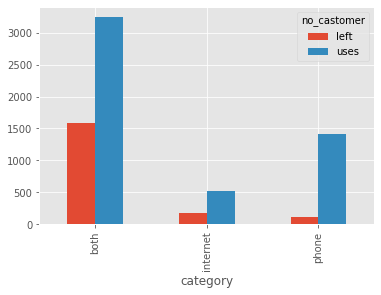

In [9]:
plt.style.use('ggplot')
all_df.groupby(['category', 'no_castomer']).no_castomer.count().unstack().plot.bar(legend=True)
plt.show()

Как видно из графика, основной отток пользователей происходит среди пользователей интернета, в то время как пользователи телефонной сети уходят в разы меньше. На это стоит обратить внимание

В данных появились пропуски - это произошло из-за того, что часть клиентов вообще не пользовались услугой интернет либо телефонией. Т.к. эти услуги не использовались заполним их значением "No", чтобы не множить категории.

In [10]:
def fillna(data):
    data = data.fillna('No')
    return data.info()
fillna(all_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
category            7043 non-null object
no_castomer         7043 non-nul

In [11]:
pd.Series(all_df['BeginDate'].unique()).sort_values()

75    2013-10-01
73    2013-11-01
76    2013-12-01
74    2014-01-01
24    2014-02-01
         ...    
2     2019-10-01
19    2019-11-01
26    2019-12-01
0     2020-01-01
71    2020-02-01
Length: 77, dtype: object

In [12]:
all_df['EndDate'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

Как видно выше - данные представленны за период с октября 2013 по февраль 2020, данные привязаны к первому числу каждого месяца. В то же время отток клиентов(судя по выборке) фиксировался последние 4 месяца - с октября 2019 по январь 2020. Т.к. других данных нет будем считать, что пользователи, расторгавшие контракт ранее, не попали в выборку.

Целевой признак находится в столбце "EndDate". Выделим дополнительную информацию из столбцов "BeginDate" и "EndDate" - срок пользования услугами компании. Т.к. целевой признак теперь выделен во вспомогательный столбец "castomer", заменим значение "No"(столбца "EndDate") на 1 февраля 2020(дата актуализации данных) в формате "ГГГГ-ММ-ДД", а имеющиеся там даты сократим до такого же формата. 

In [13]:
def repl_date(col):
    for i in range(len(col)):
        col[i] = ' '.join(col[i].split(' ')[:-1])
    col = col.replace('', '2020-02-01')
    return col
all_df['EndDate'] = repl_date(all_df['EndDate'])

Далее сменим тип данных на Datetime и вычислим разницу - срок пользования услугами

In [14]:
def format_datetime(col):
    col = pd.to_datetime(col, format='%Y-%m-%d')
    return col
all_df['BeginDate'] = format_datetime(all_df['BeginDate'])
all_df['EndDate'] = format_datetime(all_df['EndDate'])

In [15]:
all_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,category,no_castomer
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN,internet,uses
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,both,uses
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,both,left
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,internet,uses
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,both,left


In [16]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
MultipleLines       6361 non-null object
category            7043 non-null object
no_castomer     

In [17]:
def time_delta(col_1, col_2):
    delta = col_2 - col_1
    for i in range(len(delta)):
        delta[i] = delta[i].days
    delta = delta.astype('int')   
    return delta

all_df['time_delta'] = time_delta(all_df['BeginDate'], all_df['EndDate'])   

Столбец TotalCharges - тип данных object. Исправим на float

In [18]:
all_df.loc[all_df.query('TotalCharges == " "').index]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,category,no_castomer,time_delta
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN,internet,uses,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,phone,uses,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,both,uses,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,phone,uses,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,internet,uses,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,phone,uses,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,phone,uses,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,phone,uses,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,phone,uses,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes,both,uses,0


Есть пропуски в 488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754 строках в TotalCharges. Вызвано это тем, что пользователь подключен перед выгрузкой данных

In [19]:
for i in all_df.loc[all_df.query('TotalCharges == " "').index]['MonthlyCharges'].index:
    all_df['TotalCharges'][i] = all_df['MonthlyCharges'][i]

all_df.loc[all_df.query('TotalCharges == " "').index]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,category,no_castomer,time_delta


In [20]:
all_df['TotalCharges'] = all_df['TotalCharges'].astype('float')

Посмотрим распределение срока пользования услугами:

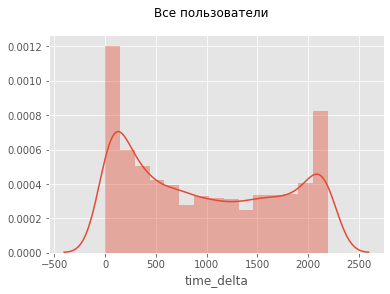

In [21]:
def distribution(col, suptitle):
    sns_plot = sns.distplot(col)
    fig = sns_plot.get_figure().suptitle(suptitle)
    
distribution(all_df['time_delta'], "Все пользователи")   

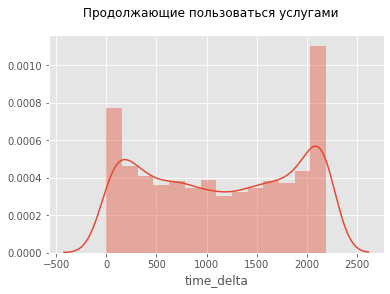

In [22]:
distribution(all_df.query('no_castomer=="uses"')['time_delta'], "Продолжающие пользоваться услугами") 

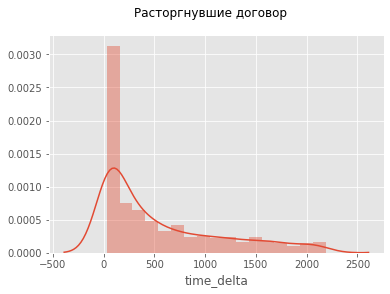

In [23]:
distribution(all_df.query('no_castomer=="left"')['time_delta'], "Расторгнувшие договор") 

Как видно из последнего графика - основной отток пользователей сосредоточен в диапазоне до 125 дней пользования услугами. Т.е. расторгают контракт чаще всего новые пользователи, а те кто давно пользуются услугами компании - до 10 раз реже.

### Два решения

Далее задача будет решаться двумя способами - а) предсказание по всей выборке, б) предсказания по трем подвыборкам(категории пользования услугами: интернет, телефон, интернет+телефон). Разделим выборку на соответствующие подвыборки

In [24]:
def selection(data, cat):
    select = data.query('category == @cat')
    return select.index
internet_df_index = selection(all_df, "internet")
phone_df_index = selection(all_df, "phone")
both_df_index = selection(all_df, "both")

Отбросим ненужные столбцы и поделим таблицу на две - с признаками и целевым признаком. Т.к. объектом предсказания будет уход клиента, то обозначим всех ушедших как "1", остальные - "0"

In [25]:
def feat_targ(data, col_for_drop):
    features = data.drop(col_for_drop, axis=1)
    target = data['no_castomer'].replace('uses', 0).replace('left', 1)
    return features, target

features, target = feat_targ(all_df, ['customerID', 'BeginDate', 'EndDate', 'no_castomer'])
#internet_features, internet_target = feat_targ(internet_df)
#phone_features, phone_target = feat_targ(phone_df)
#both_features, both_target = feat_targ(both_df)

### Преобразование и масштабирование признаков

Преобразуем категориальные признаки в численные с помощью техники OHE

In [26]:
def ohe(data):
    features = pd.get_dummies(data, drop_first=True)
    return features
features = ohe(features)
internet_features = features.loc[internet_df_index.values]
phone_features = features.loc[phone_df_index.values]
both_features = features.loc[both_df_index.values]
internet_target = target.loc[internet_df_index.values]
phone_target = target.loc[phone_df_index.values]
both_target = target.loc[both_df_index.values]

Убедимся в отсутствии коллинеарности признаков. Построим тепловую карту

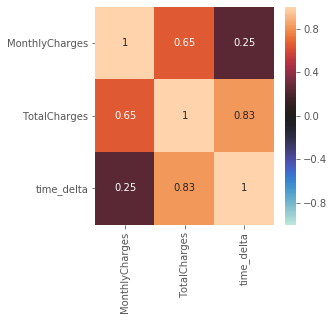

In [27]:
fig, ax = plt.subplots()

fig.set_size_inches(4, 4)
sns.heatmap(all_df.drop('SeniorCitizen', axis=1).corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

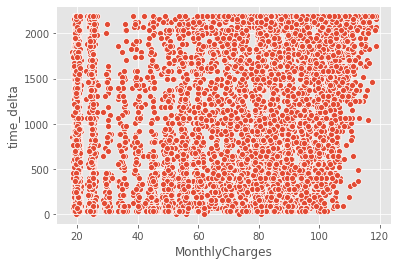

In [28]:
def scatter(data, col1, col2):
    plot = sns.scatterplot(data=data, x=col1, y=col2)
    plt.show()
    
scatter(all_df, 'MonthlyCharges', 'time_delta')

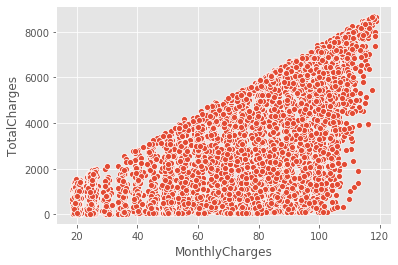

In [29]:
scatter(all_df, 'MonthlyCharges', 'TotalCharges')

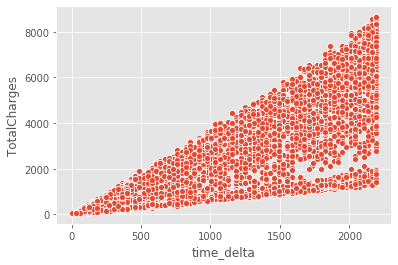

In [30]:
scatter(all_df, 'time_delta', 'TotalCharges')

Присутствует сильная скоррелированность длительности пользования услугой и суммарных затрат пользователя. Этот признак необходимо исключить из выборки для модели

Разобьем выборку на обучающую и тестовую(для двух задач):

In [31]:
def split_train_test(feat, targ):
    features_train, features_test, target_train, target_test = train_test_split(feat, targ, 
                                                                                  test_size=.2, 
                                                                                  random_state=12345)
    return features_train, features_test, target_train, target_test

features_train, features_test, target_train, target_test = split_train_test(features, 
                                                                            target)
i_features_train, i_features_test, i_target_train, i_target_test = split_train_test(internet_features,
                                                                                    internet_target)
p_features_train, p_features_test, p_target_train, p_target_test = split_train_test(phone_features,
                                                                                    phone_target)
b_features_train, b_features_test, b_target_train, b_target_test = split_train_test(both_features,
                                                                                    both_target)

Проверим нет ли утечки тестовых данных в обучающую выборку 

In [32]:
def check(train, test):
    count = 0
    answer = None
    for i in test.index:
        if i in train.index:
            count+=1
    if count == 0:
        answer = 'Утечки НЕТ'
    else:
        answer = 'ПРИСУТСТВУЕТ утечка данных'
    return answer
display('В подвыборке с пльзователями только интернет услуг:', check(i_features_train, i_features_test))
display('В подвыборке с пльзователями только телефонии:', check(i_features_train, i_features_test))
display('В подвыборке с пльзователями, которые используют обе услуги:', check(i_features_train, i_features_test))

'В подвыборке с пльзователями только интернет услуг:'

'Утечки НЕТ'

'В подвыборке с пльзователями только телефонии:'

'Утечки НЕТ'

'В подвыборке с пльзователями, которые используют обе услуги:'

'Утечки НЕТ'

### Подбор алгоритма, гиперпараметров и оценка качества

Создадим функцию, которая будет обучать модель дерева решений, подбирая необходимую глубину, предсказывать целевой признак, вычислять качество модели и строить Roc-кривую:

'Лучшее значение accuracy '

0.7735982966643009

'при глубине'

19

'Значение roc_auc'

0.7320606091656633

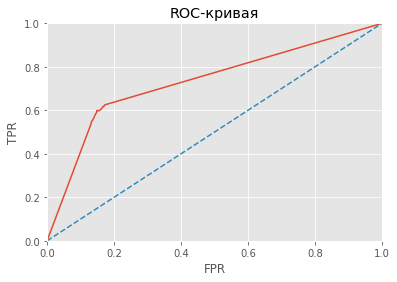

'Значение accuracy'

0.7735982966643009

In [33]:
def tree(feat_train, targ_train, feat_test, targ_test, depth_min, depth_max, new_param):
    best_depth = 0
    best_acc = 0
    best_model = None
    for depth in range(depth_min, depth_max):
        model = (DecisionTreeClassifier(max_depth=depth, 
                                        random_state=12345,
                                        class_weight=new_param).fit(feat_train, targ_train))
        predicted_valid = model.predict(feat_test)
        accuracy = accuracy_score(targ_test, predicted_valid)
        if accuracy > best_acc:
            best_depth = depth
            best_acc = accuracy
            best_model = model
    display('Лучшее значение accuracy ', best_acc)
    display('при глубине', best_depth)
    probabilities_valid = model.predict_proba(feat_test)                    #Получим предсказания
    probabilities_one_valid = probabilities_valid[:, 1]                     # класса 1
    display('Значение roc_auc')
    roc_auc = roc_auc_score(targ_test, probabilities_one_valid)
    display(roc_auc)                                                        # расчитаем roc_auc
    fpr, tpr, thresholds = roc_curve(targ_test, probabilities_one_valid)    # с помощью roc_curve расчитаем tpr и fpr для построения
    plt.figure()                                                            # roc кривой
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')                                # ROC-кривая случайной модели

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC-кривая')
    plt.show()
    display('Значение accuracy', accuracy)
    return best_acc, roc_auc
acc_tree, roc_tree = tree(features_train, target_train, features_test, target_test, 1, 20, 'balanced')

Результат даже не тянет на "три с минусом". 

Попробуем случайный лес. Создадим аналогичную функцию 

In [34]:
%%time
def forest(feat_train, targ_train, feat_test, targ_test,
           min_est, max_est, step_est, depth_min, depth_max,
           new_param, criterion, min_samples_split):
    
    best_depth = 0
    best_est = 0
    best_acc = 0
    best_model = None
    for est in range(min_est, max_est, step_est):
        for depth in range(depth_min, depth_max):
            model = RandomForestClassifier(n_estimators=est, max_depth=depth,
                                           random_state=12345, class_weight=new_param,
                                           criterion=criterion, min_samples_split=min_samples_split).\
                                           fit(feat_train, targ_train)
            predicted_valid = model.predict(feat_test)
            accuracy = accuracy_score(targ_test, predicted_valid)
            if accuracy > best_acc:
                best_depth = depth
                best_est = est
                best_acc = accuracy
                best_model = model
    display('Лучшее значение accuracy', best_acc)
    display('при глубине', best_depth)
    display('с количеством деревьев', best_est)
    probabilities_valid = model.predict_proba(feat_test)                    #Получим предсказания
    probabilities_one_valid = probabilities_valid[:, 1]                     # класса 1
    display('Значение roc_auc')
    roc_auc = roc_auc_score(targ_test, probabilities_one_valid)
    display(roc_auc)                                                        # расчитаем roc_auc
    fpr, tpr, thresholds = roc_curve(targ_test, probabilities_one_valid)    # с помощью roc_curve расчитаем tpr и fpr для построения
    plt.figure()                                                            # roc кривой
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')                                # ROC-кривая случайной модели

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC-кривая')
    plt.show()
    return model, best_acc, roc_auc



CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


'Лучшее значение accuracy'

0.7920511000709723

'при глубине'

9

'с количеством деревьев'

111

'Значение roc_auc'

0.8670825114634835

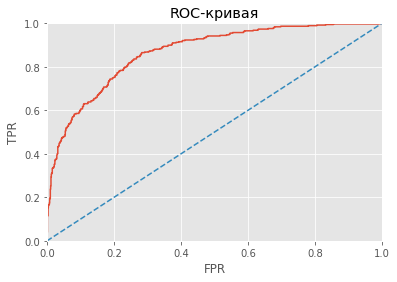

CPU times: user 46.9 s, sys: 184 ms, total: 47.1 s
Wall time: 47.4 s


In [35]:
%%time
features_best, target_best = feat_targ(all_df, ['customerID', 'BeginDate',
                                           'EndDate', 'no_castomer',
                                           'PaperlessBilling', 'SeniorCitizen',
                                           'Dependents', 'Partner', 'OnlineSecurity',
                                           'OnlineBackup', 'DeviceProtection', 'StreamingTV',
                                           'StreamingMovies', 'category'])
features_best = ohe(features_best)
features_train_best, features_test_best, target_train_best, target_test_best = split_train_test(features_best, target_best)

model, best_acc_all, roc_auc_all = forest(features_train_best, target_train_best,
                                          features_test_best, target_test_best, 
                                          100, 120, 1, 5, 11, 'balanced', 'entropy', 
                                          min_samples_split=9)

Хороший результат. Попробуем эту же функцию на подвыборках

'Лучшее значение accuracy'

0.8540145985401459

'при глубине'

8

'с количеством деревьев'

104

'Значение roc_auc'

0.8749239196591602

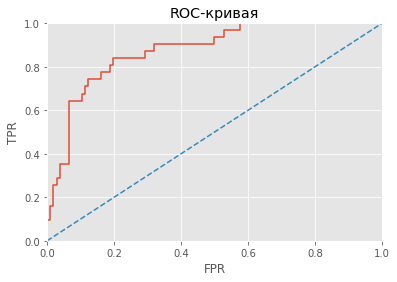

In [36]:
model, best_acc_i, roc_auc_i = forest(i_features_train, i_target_train,
                                      i_features_test, i_target_test, 
                                      100, 120, 1, 5, 11, 'balanced', 'entropy', 
                                      min_samples_split=9)

'Лучшее значение accuracy'

0.8660130718954249

'при глубине'

10

'с количеством деревьев'

100

'Значение roc_auc'

0.7950351785477233

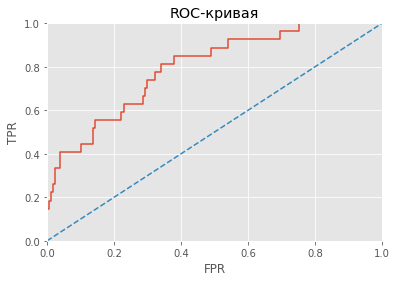

In [37]:
model, best_acc_p, roc_auc_p = forest(p_features_train, p_target_train, 
                                      p_features_test, p_target_test, 
                                      100, 120, 1, 5, 11, 'balanced', 'entropy',
                                      min_samples_split=9)

'Лучшее значение accuracy'

0.7735263702171665

'при глубине'

8

'с количеством деревьев'

111

'Значение roc_auc'

0.8449034314286804

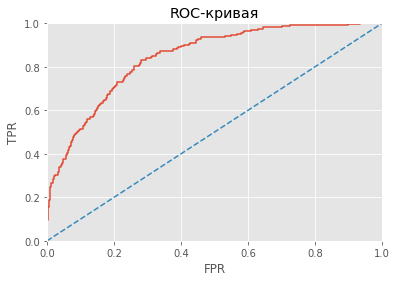

In [38]:
model, best_acc_b, roc_auc_b = forest(b_features_train, b_target_train, 
                                      b_features_test, b_target_test, 
                                      100, 120, 1, 5, 11, 'balanced', 'entropy', 
                                      min_samples_split=9)

Случайный лес даёт хороший результат. Лучший результат, все-таки, при работе алгоритма по всему датафрейму, без разделения по категориям

Масштабирование и upsampling в данном случае не дают значимого результата

Проверим как справится логистическая регрессия

'Значение accuracy'

0.8019872249822569

'Значение roc_auc'

0.8368035453544075

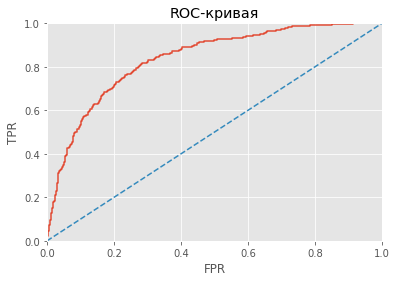

In [39]:
def logisic(feat_train, targ_train, feat_test, targ_test):
    model = LogisticRegression(random_state=12345).fit(feat_train, targ_train)
    predicted_valid = model.predict(feat_test)
    accuracy = accuracy_score(targ_test, predicted_valid)
    display('Значение accuracy', accuracy)
    probabilities_valid = model.predict_proba(feat_test)                    
    probabilities_one_valid = probabilities_valid[:, 1]                     
    display('Значение roc_auc')
    roc_auc = roc_auc_score(targ_test, probabilities_one_valid)
    display(roc_auc)              
    fpr, tpr, thresholds = roc_curve(targ_test, probabilities_one_valid)    
    plt.figure()                                                            
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')                                

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC-кривая')
    plt.show()
    return accuracy, roc_auc

acc_l, roc_auc_l = logisic(features_train, target_train, features_test, target_test)

Логистическая регрессия дает неплохой результат, но хуже, чем случайный лес

Также стоит посмотреть на значимость признаков. При работе с большим количеством данных снижение количества признаков позволит ускорить вычисления

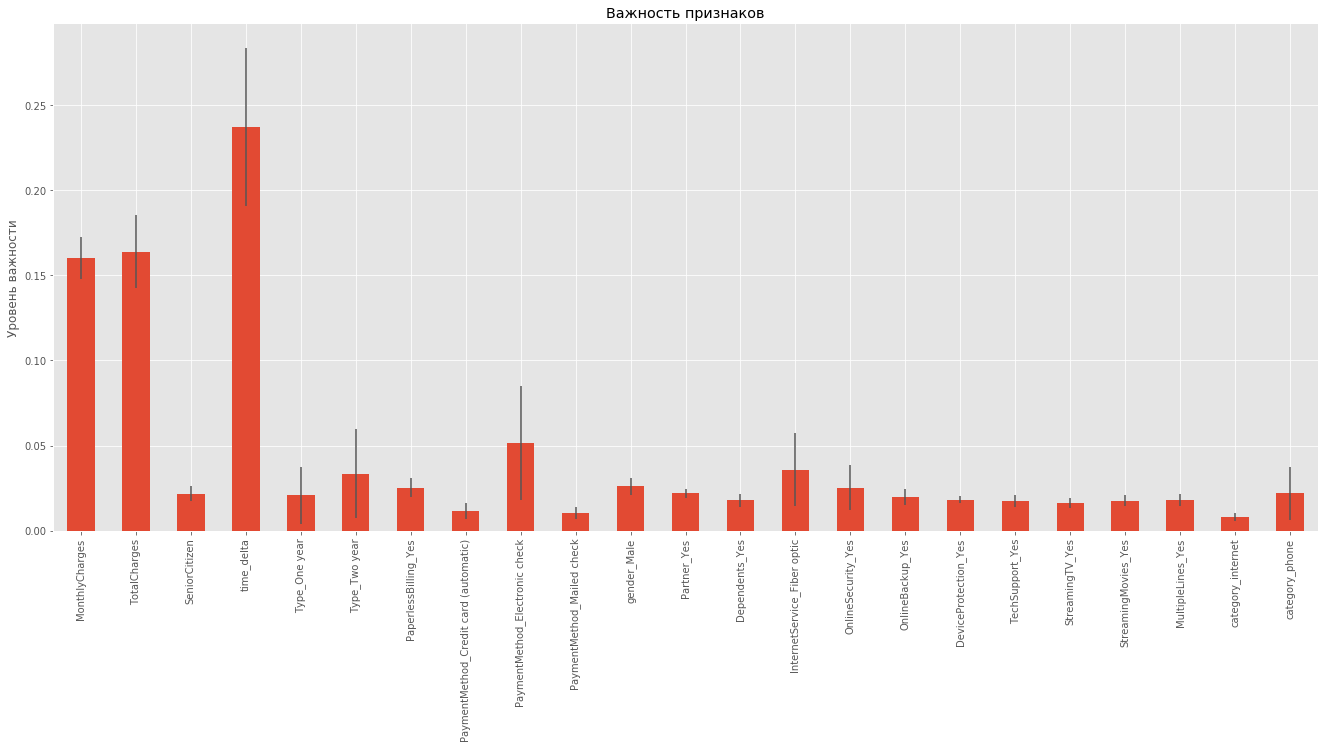

In [40]:
forest_1 = RandomForestClassifier().fit(features_train, target_train)
importances = forest_1.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest_1.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features_train.columns)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel("Уровень важности")
fig.tight_layout()

'Лучшее значение accuracy'

0.7913413768630234

'при глубине'

10

'с количеством деревьев'

102

'Значение roc_auc'

0.8632733048133822

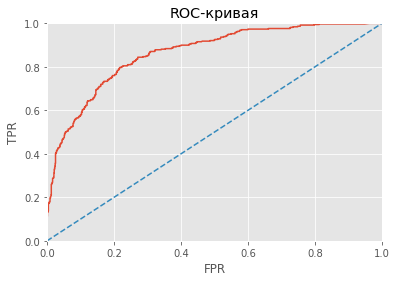

In [41]:
features_train_drop = features_train.drop( 
 ['TotalCharges', 'SeniorCitizen', 'PaperlessBilling_Yes', 
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mailed check', 'gender_Male', 
 'Partner_Yes', 'Dependents_Yes','OnlineBackup_Yes',
 'DeviceProtection_Yes', 'StreamingTV_Yes',
 'StreamingMovies_Yes', 'MultipleLines_Yes', 
 'category_internet'], axis=1)

features_test_drop = features_test.drop( 
 ['TotalCharges', 'SeniorCitizen', 'PaperlessBilling_Yes', 
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mailed check', 'gender_Male', 
 'Partner_Yes', 'Dependents_Yes','OnlineBackup_Yes',
 'DeviceProtection_Yes', 'StreamingTV_Yes',
 'StreamingMovies_Yes', 'MultipleLines_Yes', 
 'category_internet'], axis=1)

model, best_acc_nine, roc_auc_nine = forest(features_train_drop, target_train, 
                                            features_test_drop, target_test, 
                                            100, 120, 1, 5, 11, 'balanced', 'entropy', 
                                            min_samples_split=9)

Обучение модели на 2 наиболее значимых, нескоррелированный признаках

'Лучшее значение accuracy'

0.7920511000709723

'при глубине'

10

'с количеством деревьев'

114

'Значение roc_auc'

0.8583190306632169

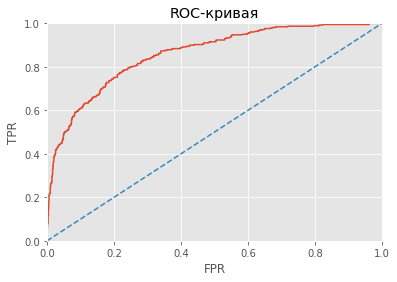

In [42]:
f_train = features_train[['MonthlyCharges', 'time_delta']]
f_test = features_test[['MonthlyCharges', 'time_delta']]
model, best_acc_two, roc_auc_two = forest(f_train, target_train, f_test, target_test, 100, 120, 1, 5, 11, 'balanced', 'entropy', min_samples_split=9)

### Вывод

In [43]:
final_report = pd.DataFrame([
              ['Дерево решений', acc_tree, roc_tree],
              ['Логистическая регрессия', acc_l, roc_auc_l],                             
              ['Случайный лес для интернет пользователей', best_acc_i, roc_auc_i],       
              ['Случайный лес для пользователей телефонии', best_acc_p, roc_auc_p],
              ['Случайный лес пользователей обеих услуг',best_acc_b, roc_auc_b],
              ['Случайный лес best', best_acc_all, roc_auc_all],
              ['Случайный лес на 9 признаках', best_acc_nine, roc_auc_nine],
              ['Случайный лес на 2 признаках', best_acc_two, roc_auc_two]
               ], 
               columns = ['Алгоритм', 'accuracy', 'ROC-AUC'])
final_report

,Алгоритм,accuracy,ROC-AUC
0,Дерево решений,0.773598,0.732061
1,Логистическая регрессия,0.801987,0.836804
2,Случайный лес для интернет пользователей,0.854015,0.874924
3,Случайный лес для пользователей телефонии,0.866013,0.795035
4,Случайный лес пользователей обеих услуг,0.773526,0.844903
5,Случайный лес best,0.792051,0.867083
6,Случайный лес на 9 признаках,0.791341,0.863273
7,Случайный лес на 2 признаках,0.792051,0.858319


Задача компании минимизировать отток пользователей и не потратить лишние средства на повышении лояльности пользователей, которые уходить не собирались. Лучше всего с этой задачей справляется RandomForestClassifier, позволяя не ошибаться в 86 случаев из 100. Это достаточно хороший результат, т.к. на оставшиеся 14 ошибочных предсказаний(по статистике данной выборки) придётся только 3-4 ушедших(~27%), а другие 10 человек получат бонус и повысится уровень лояльности. Следовательно затраты компании на повышение лояльности пользователей возможно сократить на 86%, предлагая мотивацию не всем, а только клиентам, чья вероятность уйти к конкурентам очень высока

In [44]:
display('Доля расторгнувших договор', str(round(len(all_df.query('no_castomer=="left"'))/len(all_df) * 100)) + "%")

'Доля расторгнувших договор'

'27%'

<div class="alert alert-success">
    
<b>Отчёт:</b>
    
Работа над проектом завершена.<br>
    
- Из плана проекта, составленного перед написанием основной части, выполнены все пункты, но: <br>
    а) Пункт 2 не повлиял на результат;<br>
    б) Пункт 3(разбиение на подвыборки), также не дал ожидаемых результатов<br>
- Возникшие проблемы:<br>
    a) Утечка данных, которуя я долго не мог выявить. О ней сигнализировал слишком высокое значение ROC-AUC. После длительных изучений кода ошибка была найдена<br>
    б) Не достигнут уровень ROC-AUC для максимальной оценки. Проблема не решена, но я над этим еще поработаю<br>
- Наиболее важным, как мне кажется, было качественно подготовить данные и выбрать наиболее значимые признаки. Благодаря первому стало возможным выделить один из признаков, благодаря второму - сократить пространство признаков вплоть до двух наиболее значимых(это может стать полезным для анализа значительно более крупных выборок). Но и подбор алгоритма обучение также не маловажен<br>
- Наилучший результат показала модель Случайного леса при глубине обучения 9, со 111 деревьями, с балансировкой классов, критерием разбивки - энтропия. Достигнутый уровень ROC-AUC - 0.867.
<br> 
    
</div>